In [ ]:
# from google.colab import drive
# drive.mount('/content/GoogleDrive')

In [1]:
!pip install split-folders

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, zero_one_loss, classification_report
from sklearn.model_selection import train_test_split
from imutils import paths

import matplotlib.pyplot as plt
import seaborn as sb
import splitfolders
import cv2
import random

In [3]:
inputFolder = 'C:\\Users\\mooha\\jupyter\\Graduation Project\\image_datasets\\Brain Cancer'
outputFolder = 'C:\\Users\\mooha\\jupyter\\Graduation Project\\image_dataset_(Brain)'
# inputFolder = '/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Graduation Project/Brain Cancer'
# outputFolder = '/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Graduation Project/image_dataset_(Brain) '

In [ ]:
splitfolders.ratio(inputFolder, outputFolder, seed = 44, ratio = (0.8, 0.0, 0.2))

Copying files: 20000 files [01:19, 251.00 files/s] 


In [26]:
imgPaths = list(paths.list_images(outputFolder))
print(imgPaths[0].split('\\'))

random.shuffle(imgPaths)

classes = [] # classes = ['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']
for imgPath in imgPaths:
  className = imgPath.split('\\')[-2]

  if className not in classes:
    classes.append(className)

print(classes)

X_train = []
y_train = []

X_test = []
y_test = []

IMGSIZE = 128
img_names = []

for imgPath in imgPaths:
  trainOrTest = imgPath.split('\\')[-3]
  className = imgPath.split('\\')[-2]

  img = cv2.imread(imgPath) #cv2.IMREAD_GRAYSCALE
  img = cv2.resize(img, (IMGSIZE,IMGSIZE))

  if trainOrTest == 'train':
    X_train.append(img)
    y_train.append(classes.index(className))
    img_names.append(imgPath.split('\\')[-1])

  elif trainOrTest == 'test':
    X_test.append(img)
    y_test.append(classes.index(className))

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

['C:', 'Users', 'mooha', 'jupyter', 'Graduation Project', 'image_dataset_(Brain)', 'test', 'brain_glioma', 'brain_glioma_0001.jpg']
['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']
16000 16000
4000 4000


In [20]:
# imgPaths = list(paths.list_images(outputFolder))
# print(imgPaths[0].split('\\'))

# random.shuffle(imgPaths)

# classes = [] # classes = ['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']
# for imgPath in imgPaths:
#   className = imgPath.split('\\')[-2]

#   if className not in classes:
#     classes.append(className)

# print(classes)

# X = []
# y = []

# IMGSIZE = 256
# img_names = []

# for imgPath in imgPaths:
#   className = imgPath.split('\\')[-2]

#   img = cv2.imread(imgPath) #cv2.IMREAD_GRAYSCALE
#   img = cv2.resize(img, (IMGSIZE,IMGSIZE))

#   X.append(img)
#   y.append(classes.index(className))
#   img_names.append(imgPath.split('\\')[-1])

# print(len(X), len(y))

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True) 

['C:', 'Users', 'mooha', 'jupyter', 'Graduation Project', 'image_dataset', 'test', 'brain_glioma', 'brain_glioma_0001.jpg']
['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']
20000 20000


In [27]:
df = pd.DataFrame({
    'File Name' : img_names,
    'Category' : y_train #y
})

# print(classes.index('brain_menin'))
# print(classes.index('brain_glioma'))
# print(classes.index('brain_pituitary'))
# print(classes.index('no_tumor'))

print(classes)
df.head()

['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']


,File Name,Category
0,brain_menin_4019.jpg,0
1,brain_tumor_3765.jpg,2
2,brain_tumor_4564.jpg,2
3,no_tumor_val_0079.jpg,3
4,brain_glioma_2727.jpg,1


<Axes: ylabel='count'>

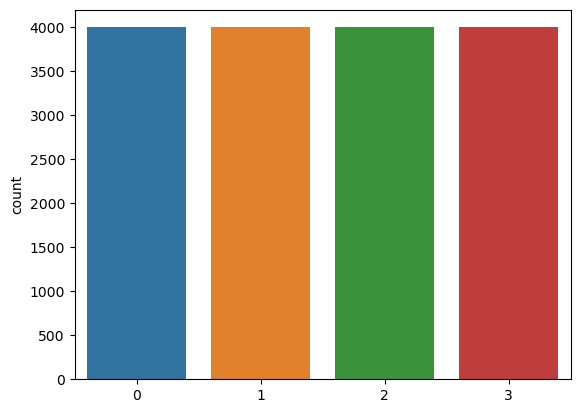

In [13]:
sb.countplot(x = y_train)

<Axes: ylabel='count'>

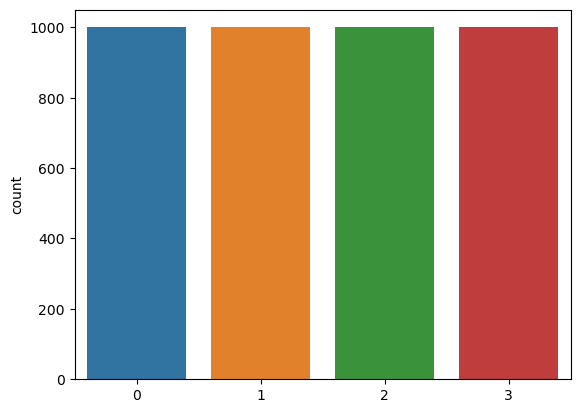

In [14]:
sb.countplot(x = y_test)

In [28]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16000, 128, 128, 3) (16000,)
(4000, 128, 128, 3) (4000,)


In [32]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (IMGSIZE, IMGSIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True) 
results = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, batch_size = 32, callbacks = [early_stopping])  
# val_loss, val_acc = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

model.summary()

Epoch 1/25
500/500 [==============================] - 136s 270ms/step - loss: 0.7872 - accuracy: 0.6752 - val_loss: 0.6730 - val_accuracy: 0.7502
Epoch 2/25
500/500 [==============================] - 136s 272ms/step - loss: 0.4440 - accuracy: 0.8338 - val_loss: 0.2970 - val_accuracy: 0.8995
Epoch 3/25
500/500 [==============================] - 136s 271ms/step - loss: 0.3207 - accuracy: 0.8841 - val_loss: 0.2974 - val_accuracy: 0.8900
Epoch 4/25
500/500 [==============================] - 138s 275ms/step - loss: 0.2288 - accuracy: 0.9156 - val_loss: 0.2467 - val_accuracy: 0.9078
Epoch 5/25
500/500 [==============================] - 140s 280ms/step - loss: 0.2019 - accuracy: 0.9280 - val_loss: 0.1247 - val_accuracy: 0.9545
Epoch 6/25
500/500 [==============================] - 140s 280ms/step - loss: 0.1592 - accuracy: 0.9419 - val_loss: 0.1573 - val_accuracy: 0.9425
Epoch 7/25
500/500 [==============================] - 139s 279ms/step - loss: 0.1484 - accuracy: 0.9477 - val_loss: 0.1102 -

In [2]:
classes = ['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']
IMGSIZE = 128

In [3]:
# model.save('C:\\Users\\mooha\\jupyter\\Graduation Project\\model_image_(Brain).h5')
loaded_model = load_model('C:\\Users\\mooha\\jupyter\\Graduation Project\\model_image_(Brain).h5')

# model.save('/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Graduation Project/model_image_(Brain).h5')
# loaded_model = model.load_weights('/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Graduation Project/model_image_(Brain).h5')  

In [6]:
# converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
# tflite_model = converter.convert()

# with open('C:\\Users\\mooha\\jupyter\\Graduation Project\\model.tflite', 'wb') as file:
#     file.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\mooha\AppData\Local\Temp\tmpg429152a\assets


INFO:tensorflow:Assets written to: C:\Users\mooha\AppData\Local\Temp\tmpg429152a\assets


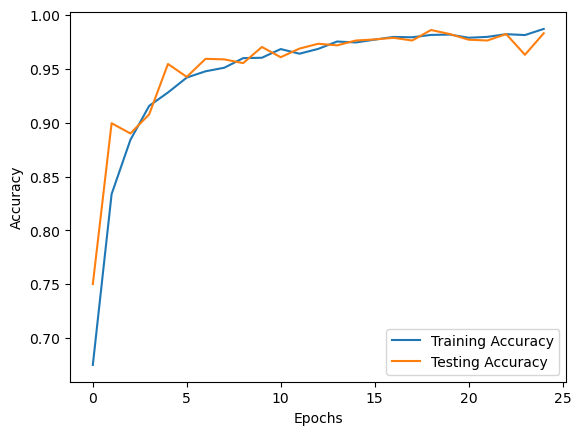

In [34]:
plt.plot(results.history['accuracy'], label = 'Training Accuracy')
plt.plot(results.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

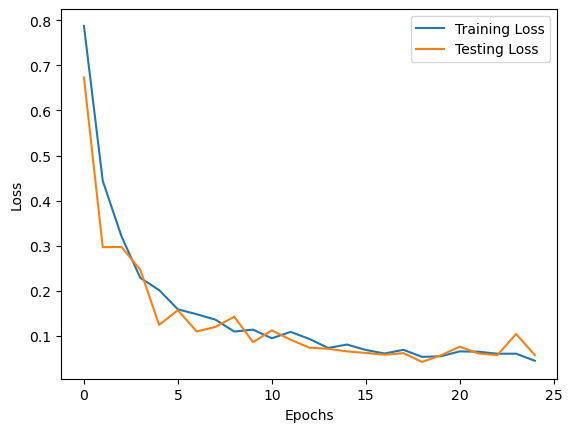

In [35]:
plt.plot(results.history['loss'], label = 'Training Loss')
plt.plot(results.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
print(classes)
print(y_test[:25], '\n')
print(y_pred[:25], '\n')

predict = []
for i in range(len(y_pred)):
  predict.append(np.argmax(y_pred[i]))

print(predict[:25], '\n')

cm = confusion_matrix(y_test, predict)
print(cm, '\n')

zol = zero_one_loss(y_test, predict, normalize = False)
print(zol, '\n')

cr = classification_report(y_test, predict)
print(cr)

['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']
[1 2 1 3 3 3 1 0 3 2 0 2 3 3 3 1 1 3 3 1 1 1 0 2 1] 

[[5.34508399e-05 9.99946535e-01 3.45726281e-10 5.63445013e-10]
 [1.60486596e-10 2.81994955e-10 9.99999940e-01 2.38264074e-12]
 [6.55414254e-13 9.99999940e-01 1.44317259e-23 4.54489731e-27]
 [1.38804572e-21 2.36249710e-28 1.11254957e-24 9.99999940e-01]
 [0.00000000e+00 0.00000000e+00 1.12328067e-36 9.99999940e-01]
 [3.92046059e-26 5.34986707e-35 6.49331494e-30 9.99999940e-01]
 [3.01304204e-09 9.99999940e-01 7.23515430e-20 5.78830190e-25]
 [9.99547303e-01 4.50939377e-04 1.79020765e-06 8.46772791e-11]
 [6.45763756e-25 2.03427735e-29 1.16953792e-22 9.99999940e-01]
 [2.34011881e-04 3.98090378e-06 9.99741793e-01 2.02522224e-05]
 [9.99678612e-01 3.15437763e-04 6.01496959e-06 2.05932715e-10]
 [1.65302698e-02 1.61162848e-06 9.82285917e-01 1.18216698e-03]
 [5.00592652e-22 1.11054585e-28 1.17172498e-24 9.99999940e-01]
 [2.18621787e-15 9.60049649e-21 5.41060286e-18 9.99999940e-01]
 

<Figure size 500x500 with 0 Axes>

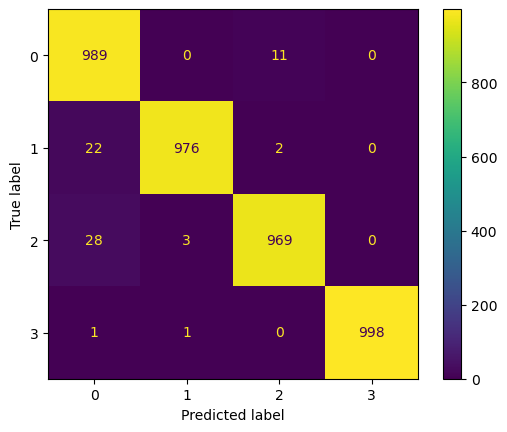

In [37]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()

<Axes: ylabel='count'>

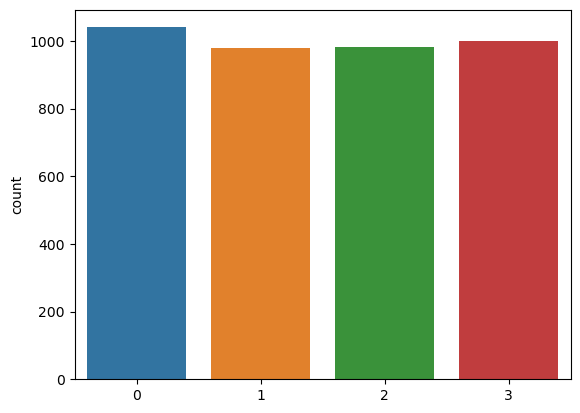

In [39]:
sb.countplot(x = predict)

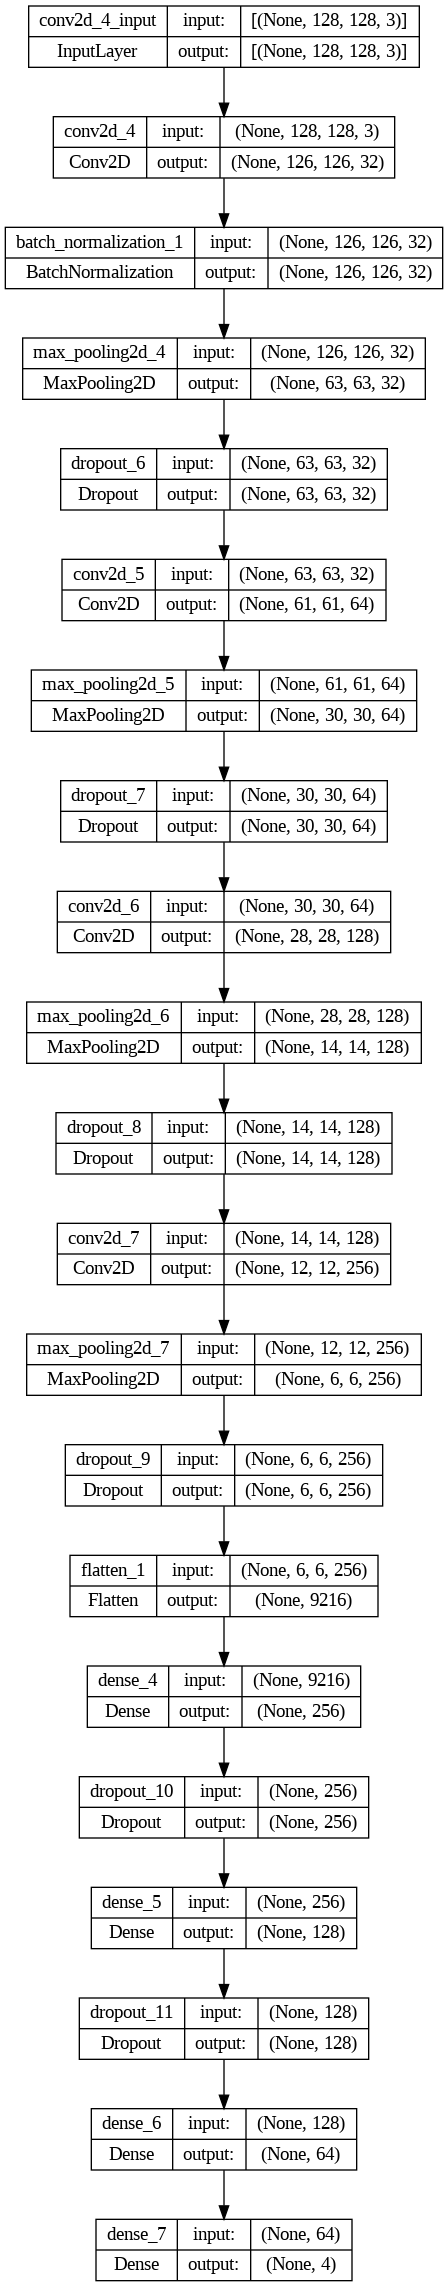

In [5]:
plot_model(model, show_shapes = True)

tf.Tensor([[2.3045536e-06 9.9999774e-01 1.9620636e-09 2.8447147e-12]], shape=(1, 4), dtype=float32)
['brain_menin', 'brain_glioma', 'brain_pituitary', 'no_tumor']


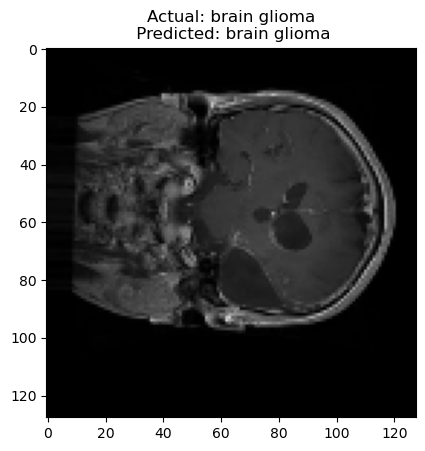

In [4]:
test_img_path = 'C:\\Users\\mooha\\jupyter\\Graduation Project\\image_dataset_(Brain)\\test\\brain_glioma\\brain_glioma_4736.jpg'
# test_img_path = '/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Graduation Project/image_dataset_(Brain)/test/brain_glioma/brain_glioma_4736.jpg'  
test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (IMGSIZE,IMGSIZE))

plt.imshow(test_img)

test_img = test_img[tf.newaxis, ...]
test_predict = loaded_model(test_img)
# test_predict = model.predict(test_img)

str1 = test_img_path.split('\\')[-1].split('_')[0]
str2 = test_img_path.split('\\')[-1].split('_')[1]
str3 = classes[np.argmax(test_predict)].split('_')[0] + ' ' + classes[np.argmax(test_predict)].split('_')[1]

plt.title('Actual: ' + str1 + ' ' + str2 + '\n Predicted: ' + str3)

print(test_predict)
print(classes)
plt.show()